In [46]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

df= pd.read_csv(r'C:\Users\17742\Desktop\Data Projects\LSTM-Multivariate_pollution.csv')

In [47]:
df

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...
43795,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43796,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43797,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43798,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [48]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

date - 0.0%
pollution - 0.0%
dew - 0.0%
temp - 0.0%
press - 0.0%
wnd_dir - 0.0%
wnd_spd - 0.0%
snow - 0.0%
rain - 0.0%


In [18]:
df.dtypes

date          object
pollution    float64
dew            int64
temp         float64
press        float64
wnd_dir       object
wnd_spd      float64
snow           int64
rain           int64
dtype: object

<AxesSubplot:xlabel='wnd_spd', ylabel='pollution'>

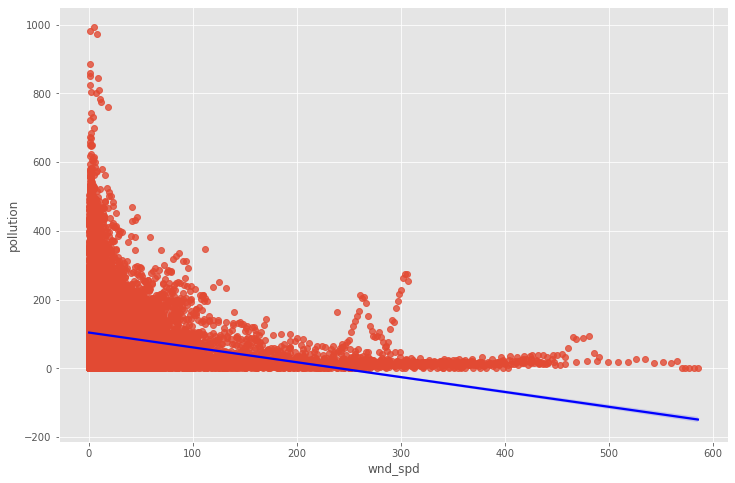

In [29]:
sns.regplot(x='wnd_spd', y='pollution', data= df,line_kws={"color":"blue"})

In [31]:
df_corr =df.corr()

df_corr

,pollution,dew,temp,press,wnd_spd,snow,rain
pollution,1.000000,0.157585,-0.090798,-0.045544,-0.234362,0.022226,-0.049045
dew,0.157585,1.000000,0.824432,-0.778737,-0.296720,-0.034484,0.125053
temp,-0.090798,0.824432,1.000000,-0.827205,-0.154902,-0.092726,0.049037
press,-0.045544,-0.778737,-0.827205,1.000000,0.185380,0.069031,-0.079840
wnd_spd,-0.234362,-0.296720,-0.154902,0.185380,1.000000,0.021876,-0.010137
snow,0.022226,-0.034484,-0.092726,0.069031,0.021876,1.000000,-0.009553
rain,-0.049045,0.125053,0.049037,-0.079840,-0.010137,-0.009553,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

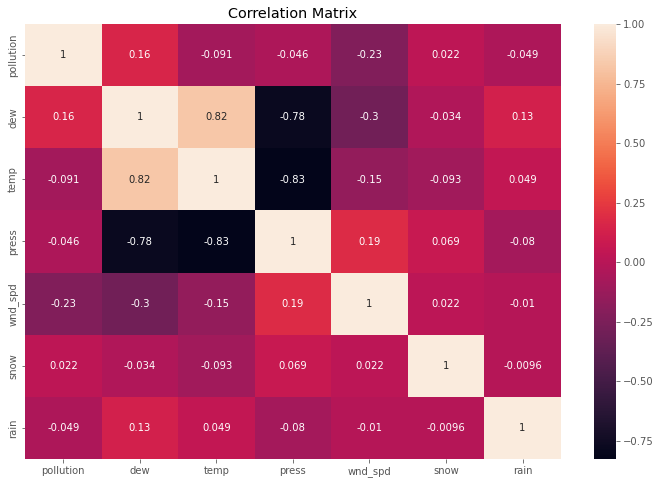

In [35]:
sns.heatmap(df_corr, annot=True )

plt.title("Correlation Matrix")

In [50]:
df_num = df

for col_name in df_num.columns:
    if(df_num[col_name].dtype== 'object'):
        df_num[col_name]= df_num[col_name].astype('category') 
        df_num[col_name]=df_num[col_name].cat.codes
        
df_num.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,0,129.0,-16,-4.0,1020.0,2,1.79,0,0
1,1,148.0,-15,-4.0,1020.0,2,2.68,0,0
2,2,159.0,-11,-5.0,1021.0,2,3.57,0,0
3,3,181.0,-7,-5.0,1022.0,2,5.36,1,0
4,4,138.0,-7,-5.0,1022.0,2,6.25,2,0


Text(0.5, 1.0, 'Correlation Matrix')

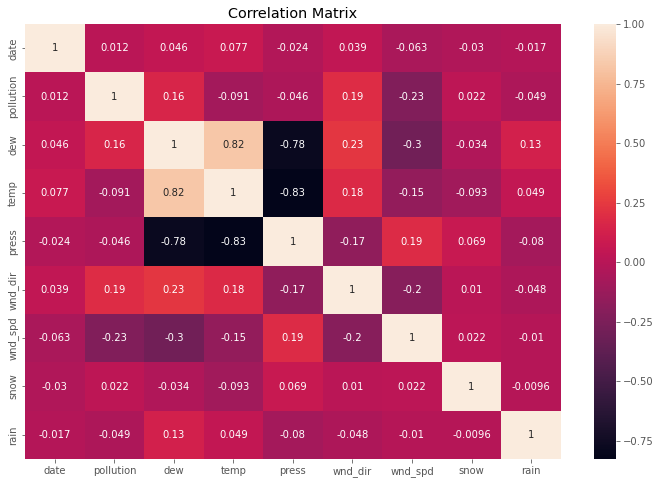

In [56]:
df_num_cor =df_num.corr()

sns.heatmap(df_num_cor, annot=True )

plt.title("Correlation Matrix")

In [61]:
fd_pair= df_num_cor.unstack()
pd.set_option('display.max_rows', None)
fd_pair

date       date         1.000000
           pollution    0.011741
           dew          0.046380
           temp         0.076783
           press       -0.024185
           wnd_dir      0.039220
           wnd_spd     -0.062659
           snow        -0.029554
           rain        -0.016708
pollution  date         0.011741
           pollution    1.000000
           dew          0.157585
           temp        -0.090798
           press       -0.045544
           wnd_dir      0.187459
           wnd_spd     -0.234362
           snow         0.022226
           rain        -0.049045
dew        date         0.046380
           pollution    0.157585
           dew          1.000000
           temp         0.824432
           press       -0.778737
           wnd_dir      0.232960
           wnd_spd     -0.296720
           snow        -0.034484
           rain         0.125053
temp       date         0.076783
           pollution   -0.090798
           dew          0.824432
          